In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import PROJECT.util as f

In [7]:
def main_gradient_2_sans_proj_normalisation(iteration, u_p, v_p, Y, u_, v_, N, M, lambda_, beta_u, beta_v, lambda_1, lambda_2, dt):

    res = []
    
    mod = iteration*0.1

    for i in range(iteration):

        # Computation
        sqrt_dt = torch.sqrt(dt)

        u_1 = (1/lambda_1) * f.gradient_u_2(N, M, u_p,v_p,Y,lambda_) * dt
        u_2 = torch.sqrt(2/(lambda_1*beta_u)) * torch.empty(N).normal_(mean=0,std=sqrt_dt)
        u_3 = ((N-1)/(N*lambda_1*beta_u))*u_p*dt
        u_n = u_p - u_1 + u_2 - u_3

        v_1 = 1/lambda_2 * f.gradient_v_2(N,M,u_p,v_p,Y,lambda_) * dt
        v_2 = torch.sqrt(2/(lambda_2*beta_v)) * torch.empty(M).normal_(mean=0,std=sqrt_dt)
        v_3 = ((M-1)/(M*lambda_2*beta_v))*v_p*dt
        v_n = v_p - v_1 + v_2 - v_3

        # Normalisation
        u_n = u_n / torch.linalg.norm(u_n)
        v_n = v_n / torch.linalg.norm(v_n)
        u_n = u_n * torch.sqrt(N)
        v_n = v_n * torch.sqrt(M)

        # Re-asign for the loop
        u_p = u_n
        v_p = v_n
    
        res_u = torch.abs(f.overlap(u_,u_n,N))
        res_v = torch.abs(f.overlap(v_,v_n,M))
        res.append((res_u,res_v))
        
        if i%mod==0:
            print(f"progress {100*i/iteration:.2f}%", end="\r")
        if i==iteration-1:
            print(f"overlap(u, v): ({res_u}; {res_v})")

    return np.array(res)

In [8]:
def one_run(lambda_=2, N=500, M=500, beta_u=float("inf"), beta_v=float("inf"), lambda_1=1,
        lambda_2=1, dt=1/100, iteration=5000):
      #Size of the matrix Y
    N = torch.tensor(N)
    M = torch.tensor(M)

    # lambda
    lambda_ = torch.tensor(lambda_)

    #temperatures
    beta_u = torch.tensor(beta_u)
    beta_v = torch.tensor(beta_v)

    #learning rates
    lambda_1 = torch.tensor(lambda_1)
    lambda_2 = torch.tensor(lambda_2)

    # Pas de temps
    dt = torch.tensor(dt)

    u_ = f.generate_vector(N)
    v_ = f.generate_vector(M)

    Y = f.generate_Y(N, M, u_,v_, lambda_)
    #print(Y)

    # Conditions initiales
    u_p = f.generate_vector(N)
    v_p = f.generate_vector(M)

    # Perform the gradient descent
    res = main_gradient_2_sans_proj_normalisation(iteration, u_p, v_p, Y, u_, v_, N, M, lambda_, beta_u, beta_v, lambda_1, lambda_2, dt)
    
    return res


In [9]:
# MAIN METHOD:

def main(size_of_one_sample, list_value_):
    
    sample_iterations=[]
    sample_overlap_mean=[]
    
    for value_to_test in list_value_:
        
        # Calculation
        iterations_for_each_run = [one_run(lambda_=value_to_test) for _ in range(size_of_one_sample)]
        
        # Calculate mean 
        overlap_mean = np.array([x[-1] for x in iterations_for_each_run])
        
        # Store results
        sample_iterations.append(iterations_for_each_run)
        sample_overlap_mean.append(overlap_mean)
    return np.array(sample_iterations), np.array(sample_overlap_mean)

In [37]:
# MAIN CELL: DO THE COMPUTATION

list_value_ = np.arange(0.1, 3, 0.1)
#list_value_ = np.array([0.2,0.5,0.7,1,1.3,1.8])

size_of_one_sample=10

(sample_iterations, sample_overlap_mean) = main(size_of_one_sample, list_value_)

overlap(u, v): (0.04546798765659332; 0.0798301100730896)
overlap(u, v): (0.01345728524029255; 0.054782211780548096)
overlap(u, v): (0.03820454329252243; 0.007395338267087936)
overlap(u, v): (0.031717948615550995; 0.030019287019968033)
overlap(u, v): (0.18252815306186676; 0.17039956152439117)
overlap(u, v): (0.0005700035253539681; 0.06373606622219086)
overlap(u, v): (0.04130518063902855; 0.04919283464550972)
overlap(u, v): (0.01800483651459217; 0.028943492099642754)
overlap(u, v): (0.1426318734884262; 0.08986720442771912)
overlap(u, v): (0.06263791024684906; 0.01697908341884613)
overlap(u, v): (0.1522544026374817; 0.11031071841716766)
overlap(u, v): (0.021347416564822197; 0.0647696852684021)
overlap(u, v): (0.0606691800057888; 0.039925143122673035)
overlap(u, v): (0.04534843564033508; 0.02502448670566082)
overlap(u, v): (0.02734251692891121; 0.013558289036154747)
overlap(u, v): (0.02659662999212742; 0.011222679167985916)
overlap(u, v): (0.01642780937254429; 0.07009350508451462)
overlap(

overlap(u, v): (0.6908107995986938; 0.6483140587806702)
overlap(u, v): (0.5892270803451538; 0.5754123330116272)
overlap(u, v): (0.5616800785064697; 0.5541008114814758)
overlap(u, v): (0.6030685901641846; 0.6142839193344116)
overlap(u, v): (0.42314255237579346; 0.43803825974464417)
overlap(u, v): (0.5610451698303223; 0.5660590529441833)
overlap(u, v): (0.655769407749176; 0.6353863477706909)
overlap(u, v): (0.4907097816467285; 0.5061154961585999)
overlap(u, v): (0.6863781809806824; 0.6811517477035522)
overlap(u, v): (0.42879247665405273; 0.47166556119918823)
overlap(u, v): (0.5513538718223572; 0.5210402607917786)
overlap(u, v): (0.5724323391914368; 0.5568438172340393)
overlap(u, v): (0.5638521909713745; 0.5632923245429993)
overlap(u, v): (0.6924974322319031; 0.6678771376609802)
overlap(u, v): (0.6530441045761108; 0.6288508772850037)
overlap(u, v): (0.6024683713912964; 0.5935472846031189)
overlap(u, v): (0.5561622381210327; 0.5753233432769775)
overlap(u, v): (0.6005696058273315; 0.6384416

overlap(u, v): (0.7882108092308044; 0.8063410520553589)


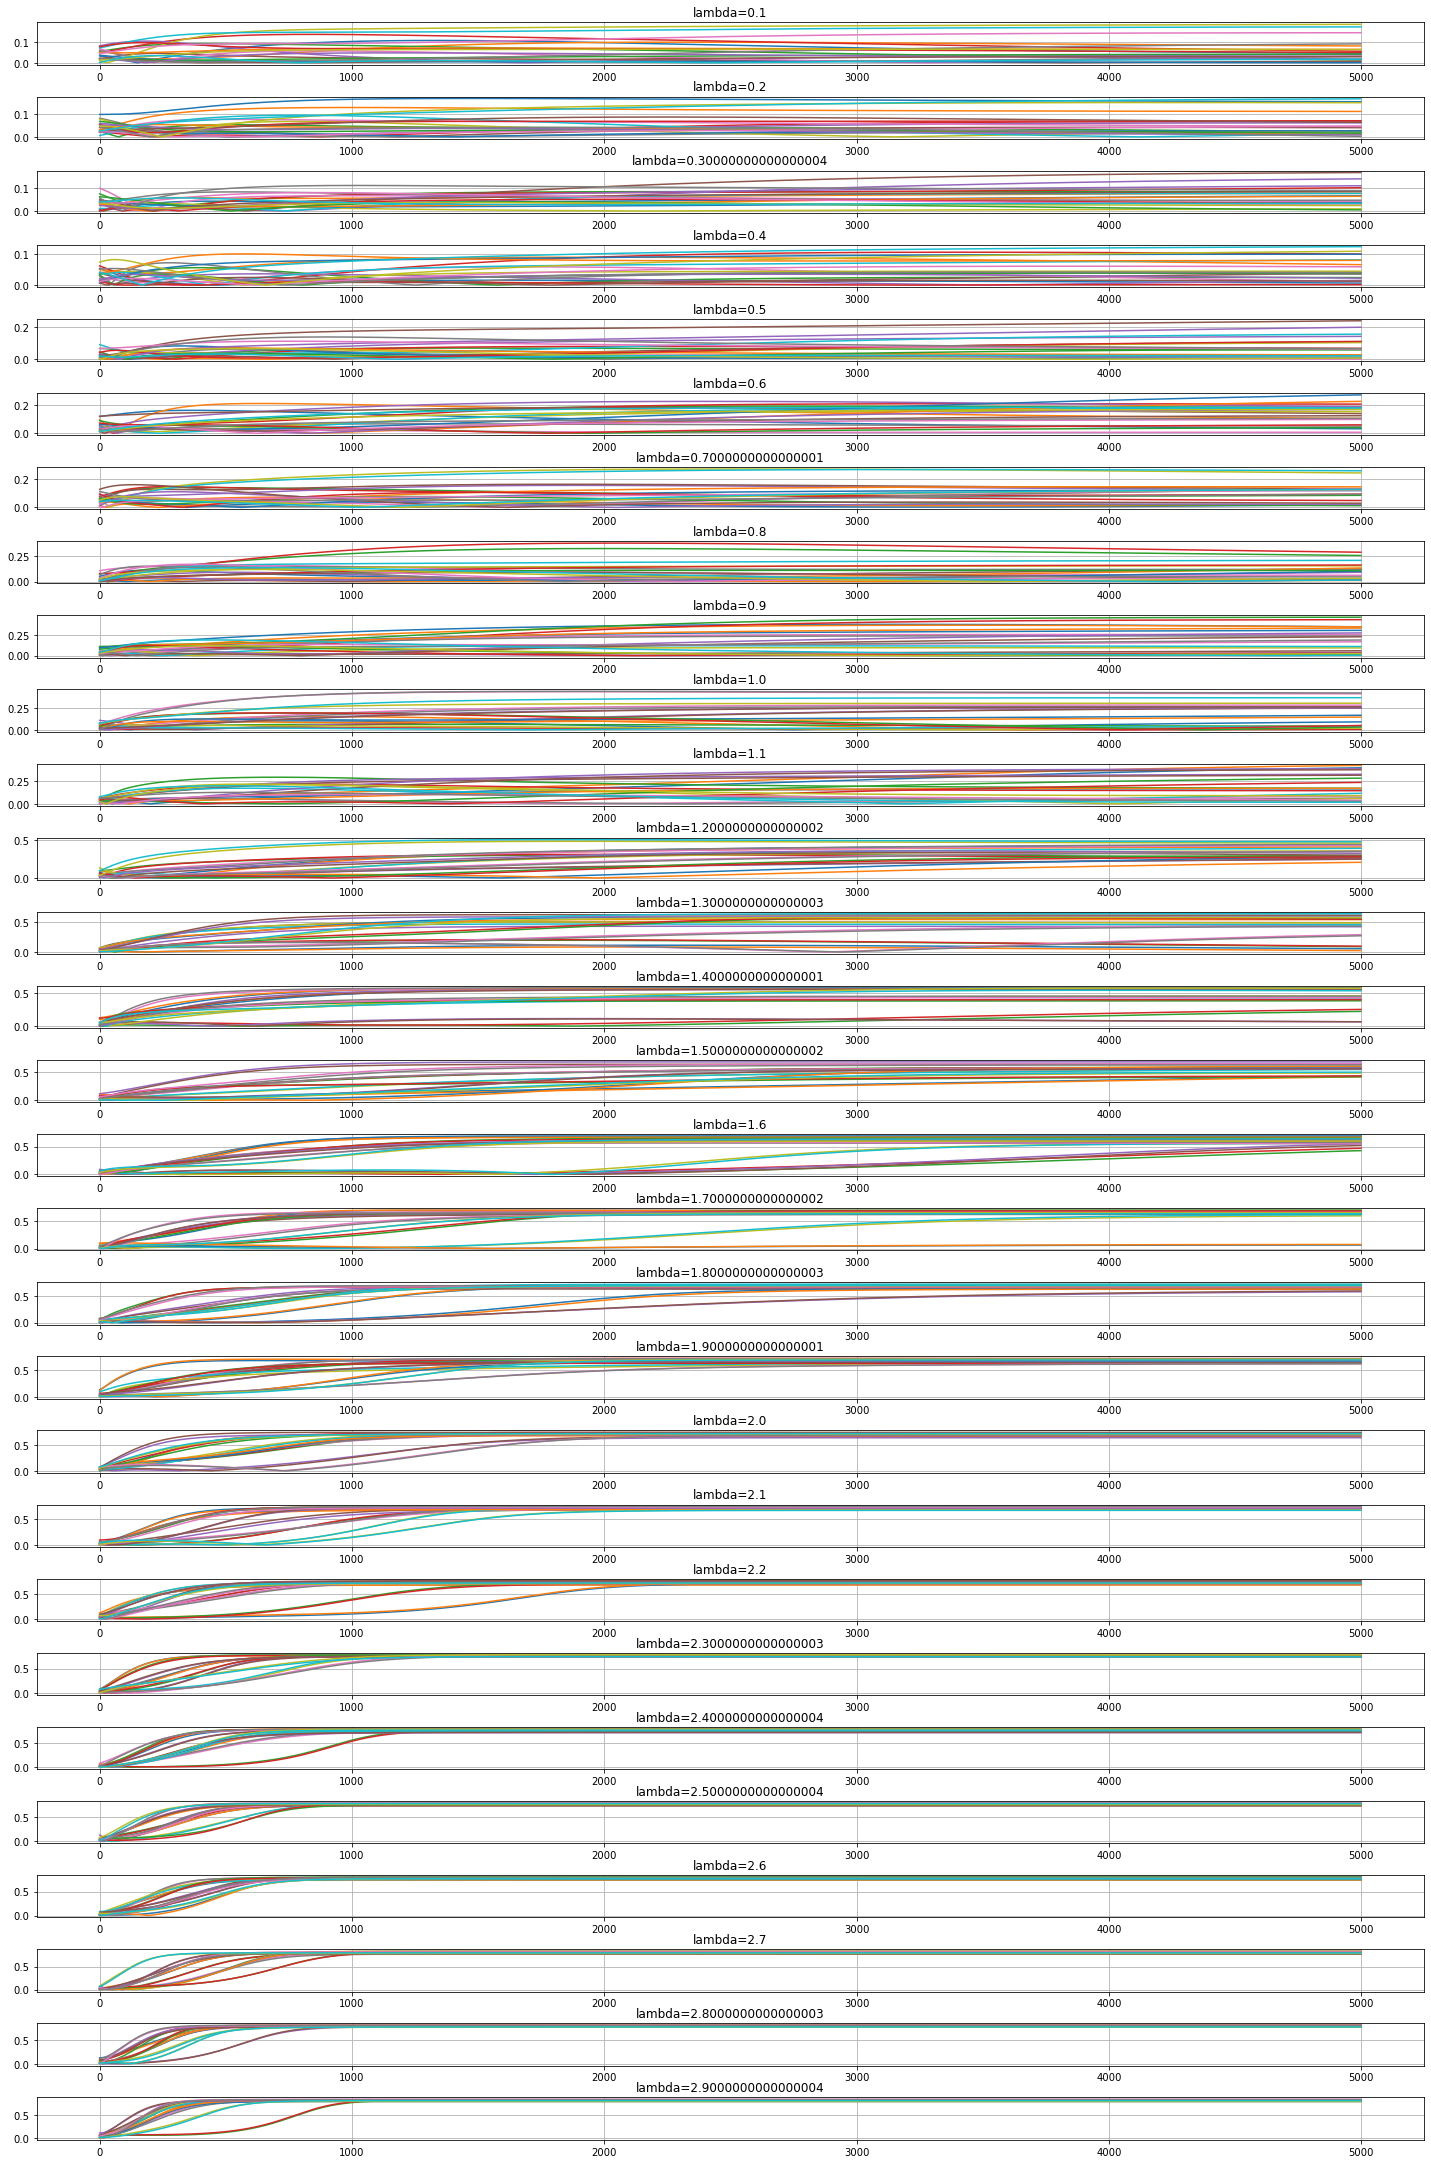

In [38]:
# PRINT THE OVERLAP IN FUNCTION OF THE STEP
fig, axs = plt.subplots(len(list_value_), figsize=(20,30))
fig.tight_layout()
for i in range(len(list_value_)):
    axs[i].grid()
    axs[i].set_title(f"lambda={list_value_[i]}")
    for run_in_on_sample in range(size_of_one_sample):
        axs[i].plot(sample_iterations[i][run_in_on_sample])

[[0.05765257 0.05911452]
 [0.05535956 0.05653096]
 [0.05524642 0.07870164]
 [0.04363921 0.05847245]
 [0.06625434 0.08404938]
 [0.13204405 0.13788319]
 [0.09911226 0.1065598 ]
 [0.08755173 0.11331812]
 [0.19897231 0.1976516 ]
 [0.18291888 0.18288413]
 [0.19789475 0.18656027]
 [0.34990603 0.33981466]
 [0.40847856 0.41101655]
 [0.44593257 0.44312286]
 [0.5596772  0.55403507]
 [0.5907551  0.58980334]
 [0.5951959  0.5949693 ]
 [0.6689175  0.67544943]
 [0.67083895 0.6810304 ]
 [0.70071876 0.7096861 ]
 [0.711039   0.7193426 ]
 [0.7299529  0.73312145]
 [0.76465625 0.7568657 ]
 [0.7640098  0.7648333 ]
 [0.771515   0.7747152 ]
 [0.7806338  0.7775493 ]
 [0.80350465 0.7977022 ]
 [0.79591423 0.80135024]
 [0.8114753  0.81563455]]
lambda= 0.1 nan
lambda= 0.2 nan
lambda= 0.30000000000000004 nan
lambda= 0.4 nan
lambda= 0.5 nan
lambda= 0.6 nan
lambda= 0.7000000000000001 nan
lambda= 0.8 nan
lambda= 0.9 nan
lambda= 1.0 0.0
lambda= 1.1 0.3015113445777637
lambda= 1.2000000000000002 0.40824829046386313
lambd

<ipython-input-39-9242213a95a4>:8: RuntimeWarning: invalid value encountered in double_scalars
  print(f"lambda= {list_value_[i]} {(1-(1/list_value_[i]))**0.5}")
<ipython-input-39-9242213a95a4>:8: RuntimeWarning: invalid value encountered in double_scalars
  print(f"lambda= {list_value_[i]} {(1-(1/list_value_[i]))**0.5}")
<ipython-input-39-9242213a95a4>:8: RuntimeWarning: invalid value encountered in double_scalars
  print(f"lambda= {list_value_[i]} {(1-(1/list_value_[i]))**0.5}")
<ipython-input-39-9242213a95a4>:8: RuntimeWarning: invalid value encountered in double_scalars
  print(f"lambda= {list_value_[i]} {(1-(1/list_value_[i]))**0.5}")
<ipython-input-39-9242213a95a4>:8: RuntimeWarning: invalid value encountered in double_scalars
  print(f"lambda= {list_value_[i]} {(1-(1/list_value_[i]))**0.5}")
<ipython-input-39-9242213a95a4>:8: RuntimeWarning: invalid value encountered in double_scalars
  print(f"lambda= {list_value_[i]} {(1-(1/list_value_[i]))**0.5}")
<ipython-input-39-9242213a95

lambda= 2.8000000000000003 0.8017837257372732
lambda= 2.9000000000000004 0.8094272134003795


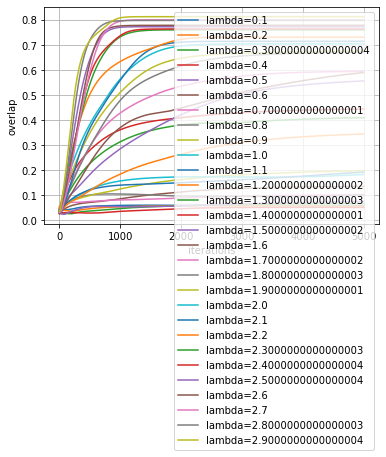

In [39]:
# PRINT THE OVERLAP IN FUNCTION OF THE STEP
a=sample_iterations.mean(axis=1).mean(axis=2)
plt.grid()
plt.ylabel("overlap")
plt.xlabel("iterations")
print(sample_overlap_mean.mean(axis=1))
for i in range(len(list_value_)):
    print(f"lambda= {list_value_[i]} {(1-(1/list_value_[i]))**0.5}")
    plt.plot(a[i], label=f"lambda={list_value_[i]}")
    plt.legend()

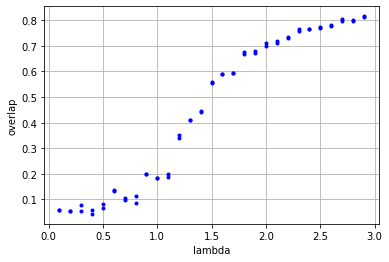

In [40]:
# 
plt.grid()
plt.ylabel("overlap")
plt.xlabel("lambda")
for i in range(len(list_value_)):
    plt.plot(list_value_[i], sample_overlap_mean.mean(axis=1)[i][0], color="b", marker=".", linestyle = 'none')
    plt.plot(list_value_[i], sample_overlap_mean.mean(axis=1)[i][1], color="b", marker=".", linestyle = 'none')